Least Squares Curve-fitting:

An example of parameterized fitting using curve_fit (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):
   
Given some data set, we can fit a parametric model to the data and obtain our fit parameters:

For each parameter set $\vec{\pi}$ and range $x$, we compare our model $f(x, \vec{\pi})$ to data set $y$ by taking the residual $r$ for each bin $i$. The residual for each bin $r_{i}$ is:
$$r_{i} = y_{i} - f(x_{i}, \vec{\pi})$$

The least-squares method finds the optimal parameter values by minimizing the sum, $S$, of squared residuals:
$$S=\sum _{i=1}^{n}{r_{i}}^{2}$$

In this example we'll use a gaussian function with parameters Amplitude, center, and width (A, mu, and sig)

In [1]:
import numpy as np

def gaussian(x, A, mu, sig):
    return A * np.exp(-(x-mu)**2 / sig)

Now we'll make some data set based off of the gaussian and add some noise

In [2]:
xExample = np.linspace(-5, 5, 1000)
np.random.seed(8)
yExample = gaussian(xExample, 7.0, 1.0, 3.0) + np.random.normal(0, 1, len(xExample))


Lets save the data:


In [3]:
saveData = np.column_stack([xExample,yExample])
np.savetxt('pythonExample.txt',saveData)

Loading data:

In [4]:
data = np.loadtxt('pythonExample.txt')
x = data[:,0]
y = data[:,1]

Here we will fit the noisy data using the curve_fit function, print, and plot the results

detailed fit
[7.19980599 0.99952344 2.93488644]
[0.0853653  0.01658422 0.08037319]


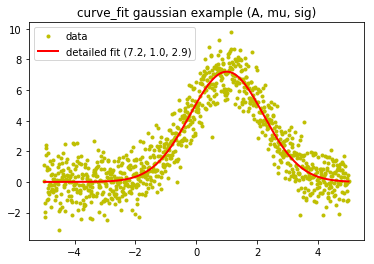

In [6]:


import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

paramGuess = [7, 1, 3]  #initial guess for [A, mu, sig]
parLim = [(0, 0., 0.), (10, 5., 5.)] #limits for parameters

fitPar, covar = curve_fit(gaussian, x, y, p0=paramGuess, 
                         bounds = parLim)
errPar = np.sqrt(np.diag(covar))
print 'detailed fit'
print(fitPar)
print(errPar)

plt.figure()
plt.plot(x, y, 'y.', label = 'data')

plt.plot(x, gaussian(x, *fitPar), 'r', lw=2, 
         label = 'detailed fit (%2.1f, %2.1f, %2.1f)' 
         %(fitPar[0], fitPar[1], fitPar[2]))

plt.legend(loc = 'upper left')
plt.title('curve_fit gaussian example (A, mu, sig)')
plt.show()